In [3]:
# Importing necessary libraries
from sklearn import datasets
import pandas as pd

# Loading the Iris dataset
iris = datasets.load_iris()

# Converting to a DataFrame for easier manipulation
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Displaying the first few rows to check
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


C:\Users\rosep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


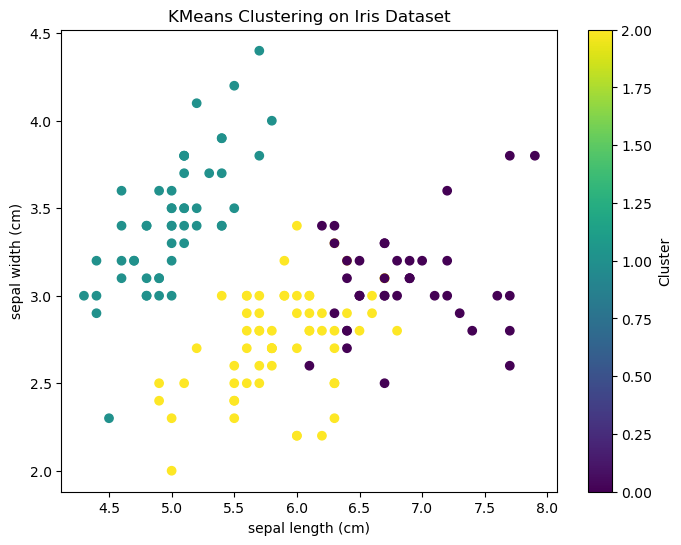

In [17]:
#KMeans works well for Iris because it assumes the clusters are spherical and well-separated. 
#we can specify the number of clusters, and KMeans quickly identifies them.

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the number of clusters (let's assume 3 clusters as there are 3 species)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fitting the KMeans model to the data
iris_df_kmeans = iris_df.copy()
kmeans.fit(iris_df_kmeans)

# Getting the cluster labels
iris_df_kmeans['Cluster'] = kmeans.labels_

# Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(iris_df_kmeans.iloc[:, 0], iris_df_kmeans.iloc[:, 1], c=iris_df_kmeans['Cluster'], cmap='viridis')
plt.title('KMeans Clustering on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.colorbar(label='Cluster')
plt.show()

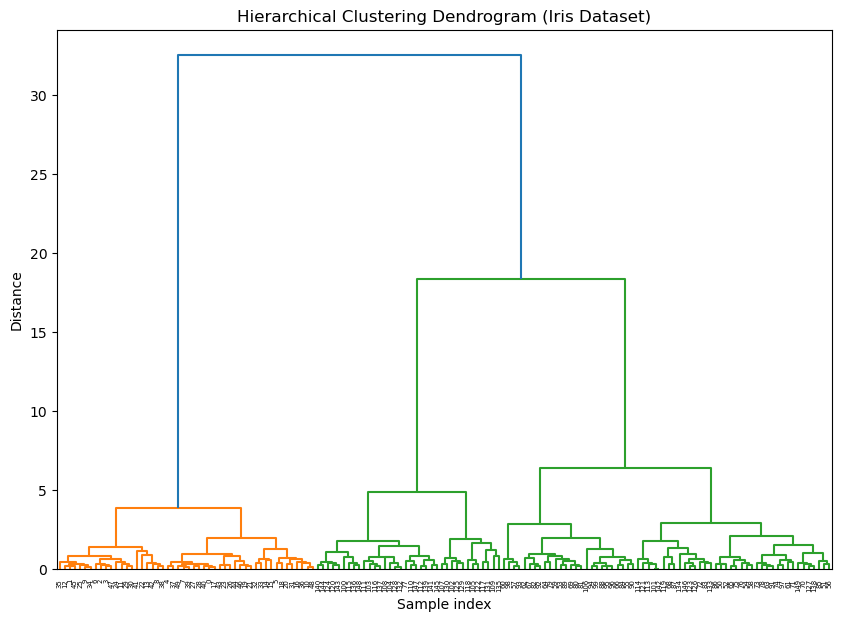

In [9]:
#Hierarchical Clustering is helpful for Iris because it creates a tree-like structure that reveals how the species are related.
#It's a good method when you want to see not only the clusters but also how they merge and how similar they are to each other.
#We don’t need to decide the number of clusters beforehand.


# Importing necessary libraries for hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Performing hierarchical clustering using AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

# Fitting the model
iris_df['Cluster_Hierarchical'] = hierarchical.fit_predict(iris_df)

# Visualizing the clusters using dendrogram
linked = linkage(iris_df, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram (Iris Dataset)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()